# ITALIAN INSTITUTE OF STATISTICS (ISTAT) MICRODATA ANALYSIS

#### Author: Guglielmo Berzano
#### Date: Academic year 2022/2023


## Description and aims of the project
During my [Master's Degree]("https://dse.cdl.unimi.it/en") I had the opportunity to attend a laboratory organized by [ISTAT](www.istat.it/en/) in which I deepened my coding knowledge.

In this notebook I am going to analyse some microdata taken from the "Rilevazione sulle Forze di Lavoro" (RFL) - "surveying on the laborforce" in English -, which is a file published quarterly by ISTAT containing info about a representative sample of the the Italian population ([click here for more info](https://www.istat.it/en/archivio/127804)).

The aim of the project is to compare data coming from central regions of Italy, namely Tuscany, Marche, Umbria, Lazio, of 2019Q4 and 2021Q4 to see whether Covid-19 had an impact on some variables or not.

### Tasks
I had to find and compare how satisfied people were about their job and the employment and unemployment rate based on gender and education level.


## Brief description of the datasets
Inside the dataset (available in the folder "Data" of this repo) you can find habits, work situation and much more info about the analysed sample. Furthermore, in the folder "Data" you can also find the questionnaires used to do the surveys and the codes for each variable.

In particular we are interested in the following variables (you can find the description both in Italian and in English):

**2019**:
- REG: regione di residenza - region of residence
- EDULEV: livello istruzione - level of education
- CLETAS: classe d'età - age group
- C59AB: lavoro trovato con centro impiego - job finded by using public structures
- C59: come è stato trovato l'attuale impiego - how was the present job finded?
- C73: soddisfazione lavorativa - job satisfaction
- SG11: sesso (1: maschio, 2: femmina) - gender (1: male, 2: female)
- COND3: condizione lavorativa 3 modalità - job condition with 3 modalities
- COND10: condizione lavorativa 10 modalità - job condition with 10 modalities
- COEFF_MIGL: coefficiente riporto migliaia - carryover coefficient to the population

**2021**:
- REGMCR: regione di residenza - region of residence
- EDULEV: livello istruzione - level of education
- CLETAS: classe d'età - age group
- QC62: come è stato trovato il lavoro - how was the present job finded?
- QC67: soddisfazione lavorativa - job satisfaction
- QSF11: sesso (1: maschio, 2: femmina) - gender (1: male, 2: female)
- COND3: condizione lavorativa 3 modalità - job condition with 3 modalities
- COND10: condizione lavorativa 10 modalità - job condition with 10 modalities
- COEFF_MIGL: coefficiente riporto migliaia - carryover coefficient to the population

For convenience, the datasets you will find in this repo are already trimmed.

## Let's start the analysis!
Firstly I am going to import the libraries I will use and the datasets.

In [1]:
#Let's import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
#Let's import the datasets
q4_19=pd.read_csv("https://raw.githubusercontent.com/guber25/ISTAT_lab/main/data/2019Q4-microdata.csv", index_col="Unnamed: 0")
q4_21=pd.read_csv("https://raw.githubusercontent.com/guber25/ISTAT_lab/main/data/2021Q4-microdata.csv", index_col="Unnamed: 0")

In [3]:
q4_19.head()

,REG,EDULEV,CLETAS,C59AB,C59,C73,SG11,COND3,COND10,COEFF
11,9,2,17,,,,2,3,10,9052
47,12,5,15,,,,1,3,10,3418
48,12,6,16,,,,2,3,10,3418
53,11,6,10,004,002,007,2,1,1,3233
93,9,5,12,005,002,008,2,1,1,22498


In [4]:
q4_21.head()

,REGMCR,EDULEV,CLETAS,QC67,QC62,QSF11,COND3,COND10,COEFF
25800,11,3,14,,,2,3,5,2613
25801,11,3,17,,,1,3,10,2815
25802,11,5,15,,,2,3,10,2815
25803,11,6,17,,,1,3,10,2393
25804,11,5,15,,,2,3,10,2393


### Data cleaning
Now I have to clean these datasets in order to have just the values of the regions I am interested in.

You can notice that regions are stored as integer values so I can select only the rows with the values of the regions I want.

Region codes:
- 9: Tuscany,
- 10: Umbria,
- 11: Marche,
- 12: Lazio

But actually, before doing that, I want to change the names of some columns, so that they are clearer.

In [5]:
regions={
    9: "Tuscany",
    10: "Umbria",
    11: "Marche",
    12: "Lazio"
}

In [6]:
#column renames
q4_19.rename(columns={"C59":"J_PUB_STR", "C59AB":"J_FOUND","C73":"J_SAT", "SG11": "GENDER"}, inplace=True)
q4_21.rename(columns={"REGMCR":"REG", "QC62":"J_FOUND","QC67":"J_SAT","QSF11":"GENDER"}, inplace=True)

In [7]:
#subsettings
q4_19=q4_19[(q4_19.REG>=9) & (q4_19.REG<=12)]
q4_21=q4_21[(q4_21.REG>=9) & (q4_21.REG<=12)]

In [8]:
q4_19.head()

,REG,EDULEV,CLETAS,J_FOUND,J_PUB_STR,J_SAT,GENDER,COND3,COND10,COEFF
11,9,2,17,,,,2,3,10,9052
47,12,5,15,,,,1,3,10,3418
48,12,6,16,,,,2,3,10,3418
53,11,6,10,004,002,007,2,1,1,3233
93,9,5,12,005,002,008,2,1,1,22498


In [9]:
q4_21.head()

,REG,EDULEV,CLETAS,J_SAT,J_FOUND,GENDER,COND3,COND10,COEFF
25800,11,3,14,,,2,3,5,2613
25801,11,3,17,,,1,3,10,2815
25802,11,5,15,,,2,3,10,2815
25803,11,6,17,,,1,3,10,2393
25804,11,5,15,,,2,3,10,2393


In [10]:
q4_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23843 entries, 25800 to 128571
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   REG      23843 non-null  int64 
 1   EDULEV   23843 non-null  object
 2   CLETAS   23843 non-null  int64 
 3   J_SAT    23843 non-null  object
 4   J_FOUND  23843 non-null  object
 5   GENDER   23843 non-null  int64 
 6   COND3    23843 non-null  int64 
 7   COND10   23843 non-null  int64 
 8   COEFF    23843 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.8+ MB


Now we can now state that the data are clear, there are some missing values but they are not going to affect the analysis.

### ANALYSIS OF JOB SATISFACTION

To analyse satisfaction, I am going to create a function that will count the frequencies of each level of satisfaction.

In [11]:
def satisfaction (reg, anno):
    if anno==19:
        df=q4_19
        
    if anno==21:
        df=q4_21

    a=df[(df.J_SAT!="   ") & (df.REG==reg)] #eliminating null rows
    a=round(a.groupby(by=["J_SAT"])["COEFF"].sum()/10000) #we do this to come back to the total population, starting from
    #the statistical significant sample
    sodd=zip(a.keys(), list(a))
    sodd=pd.DataFrame(sodd, columns=["Score", "Total"])
    sodd["Percentages"]=(sodd["Total"]/(sodd["Total"].sum()))*100
    sodd=sodd.drop("Total", 1)
    sodd=dict(sodd.values)

    return sodd

In [12]:
satisfaction_list=[]
temp_list=[]
for anno in [19,21]:
    for reg in list(regions.keys()):
        temp_list.append(satisfaction(reg, anno))
    satisfaction_list.append(temp_list)
    temp_list=[]

C:\Users\gugli\AppData\Local\Temp\ipykernel_14544\3429230204.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sodd=sodd.drop("Total", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_14544\3429230204.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sodd=sodd.drop("Total", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_14544\3429230204.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sodd=sodd.drop("Total", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_14544\3429230204.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sodd=sodd.drop("Total", 1)
C:\Users\gugli\AppData\Local\Temp\ipykernel_14544\3429230204.py:14: FutureWarning: I

### Problem
By analysing the data we see that the second list contained in the 2019 list, namely "Marche 2019" is one element short. Thus we have to increase the lenght of that so that it is comparable with all the other lists.

Since it is quite difficult to move elements inside a dict, I will only work with lists.

In [13]:
marche19=[]
marche19.append(list(satisfaction_list[0][2].values())[0])
marche19.append(0)
for i in list(satisfaction_list[0][2].values())[1:]:
    marche19.append(i)
marche19

[0.9448818897637795,
 0,
 0.6299212598425197,
 0.47244094488188976,
 0.31496062992125984,
 3.4645669291338583,
 11.968503937007874,
 26.614173228346456,
 34.960629921259844,
 9.133858267716535,
 10.866141732283465,
 0.6299212598425197]

In [14]:
satisfaction_list[0][2]=marche19

Now that the problem is solved, we can proceed by creating the plots for satisfaction using the library matplotlib imported as plt.

In [15]:
# labels for satisfaction
job_sat=[i for i in range(0,11)]
job_sat.append("DK")

In [16]:
def sat_plt(reg_nr):
    plt.figure(figsize=(10,7), dpi=70)
    ax=plt.axes()
    n=12
    width=0.3
    ind=np.arange(n)
    
    if reg_nr!=2:
        plt.bar(ind, satisfaction_list[0][reg_nr].values() , width, label='Q4 2019',color="maroon")
    else:
        plt.bar(ind, satisfaction_list[0][reg_nr], width, label='Q4 2019',color="maroon")
    plt.bar(ind + width, satisfaction_list[1][reg_nr].values(), width, label='Q4 2021',color="red")
    plt.xticks(ind+.3/ 2,job_sat, fontsize=12)

    plt.legend()
    plt.grid(axis="y")
    plt.ylim([0,40])
    ax.set_facecolor("gainsboro")
    plt.ylabel("Percentage rate", fontsize=13)
    plt.title("JOB SATISFACTION FOR THE CURRENT WORKPLACE ({})\n".format(list(regions.values())[reg_nr]).upper(), fontsize=20, fontname='Times New Roman')

    plt.show()

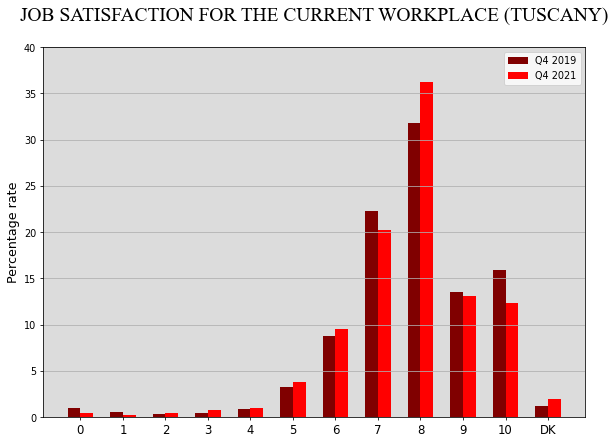

In [17]:
sat_plt(0)

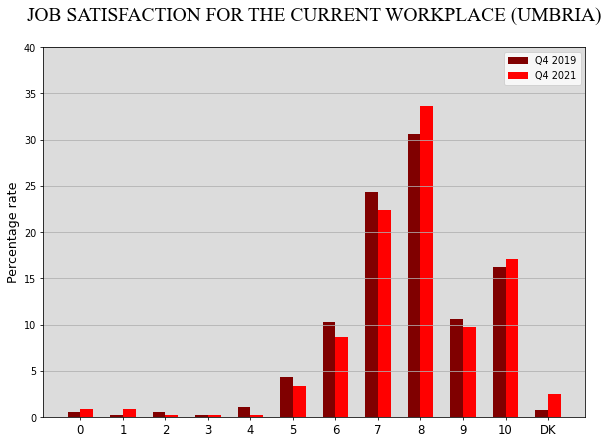

In [18]:
sat_plt(1)

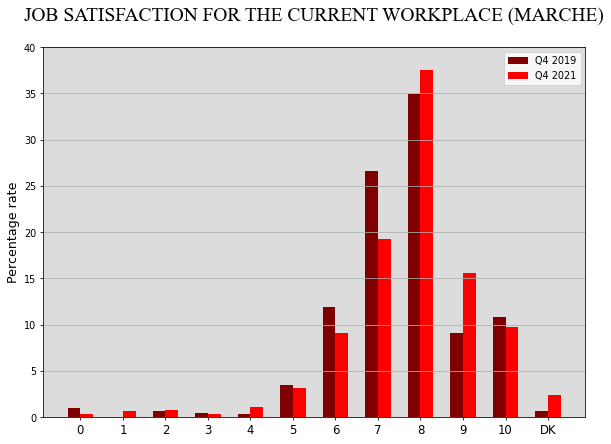

In [19]:
sat_plt(2)

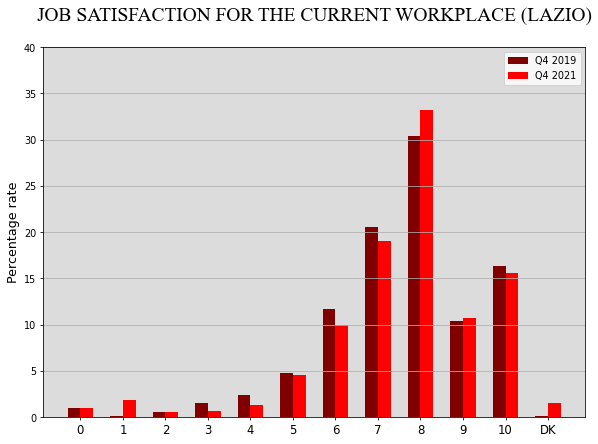

In [20]:
sat_plt(3)

### OCCUPATION RATE
Next I will analyse occupation rate in all the centre-Italian regions.

To do so I will create a funcion to do that automatically.

In [21]:
def occ(reg, anno):
    if anno==19:
        df=q4_19
        
    if anno==21:
        df=q4_21
 
    a=df[df.REG==reg]
    a=round(a.groupby(by=["COND10"])["COEFF"].sum()/10000)
    occ=zip(a.keys(), list(a))
    occ=pd.DataFrame(occ, columns=["Mod", "Totale"])
    occ["Percentage"]=(occ["Totale"]/pd.Series(list(occ["Totale"]))[0:8].sum())*100
    return occ["Percentage"][0]

In [22]:
occupation_list=[]
temp_list=[]
for anno in [19,21]:
    for reg in list(regions.keys()):
        temp_list.append(occ(reg=reg, anno=anno))
    occupation_list.append(temp_list)
    temp_list=[]
occupation_list

[[67.36842105263158, 66.72694394213381, 65.80310880829016, 61.75319593008087],
 [67.90598290598291, 66.23376623376623, 66.0695468914647, 62.12811578665237]]

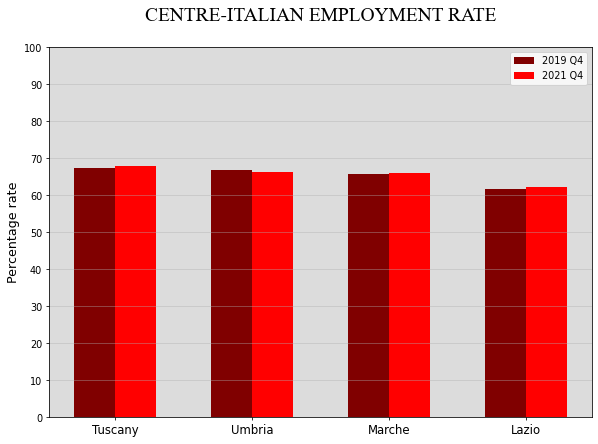

In [23]:
plt.figure(figsize=(10,7), dpi=70)
n=4
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, occupation_list[0], width, label='2019 Q4',color="maroon")
plt.bar(ind + width, occupation_list[1], width, label='2021 Q4',color="red")
plt.xticks(ind + width / 2, (regions.values()), fontsize=12)
plt.legend()
plt.yticks(range(0,101,10))
plt.grid(axis="y",alpha=0.5)
plt.ylim([0,100])
ax.set_facecolor("gainsboro")
plt.ylabel("Percentage rate", fontsize=13)
plt.title("CENTRE-ITALIAN EMPLOYMENT RATE\n", fontsize=20, fontname='Times New Roman')

plt.show()

### UNEMPLOYMENT AND INACTIVITY ANALYSIS
Now I am going to analyse unemployment and inactivity based on education level. As always, any analysis will be divided by region and year.

In [24]:
def disocc(reg, anno):
    if anno==19:
        df=q4_19
        
    if anno==21:
        df=q4_21
    
    a=df[df.REG==reg]
    a=round(a.groupby(by=["COND10"])["COEFF"].sum()/10000)
    occ=zip(a.keys(), list(a))
    occ=pd.DataFrame(occ, columns=["Mod", "Totale"])
    disocc=pd.Series(list(occ.Totale)[1:4]).sum()/pd.Series(list(occ.Totale)[:4]).sum()*100
    return disocc

In [25]:
unemployment_list=[]
temp_list=[]
for anno in [19,21]:
    for reg in list(regions.keys()):
        temp_list.append(disocc(reg=reg, anno=anno))
    unemployment_list.append(temp_list)
    temp_list=[]
unemployment_list

[[6.158357771260997, 7.98004987531172, 8.633093525179856, 10.06838905775076],
 [6.529411764705882, 5.555555555555555, 6.4179104477611935, 10.18984889577683]]

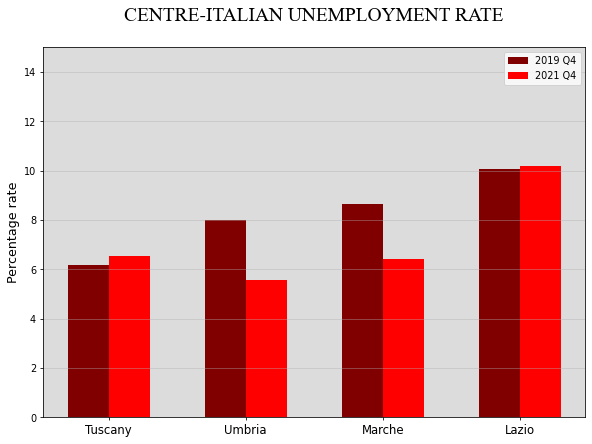

In [26]:
plt.figure(figsize=(10,7), dpi=70)
n=4
width=0.3
ind=np.arange(n)
ax=plt.axes()
plt.bar(ind, unemployment_list[0], width, label='2019 Q4',color="maroon")
plt.bar(ind + width, unemployment_list[1], width, label='2021 Q4',color="red")
plt.xticks(ind + width / 2, (regions.values()), fontsize=12)
plt.legend()
plt.yticks(range(0,20,2))
plt.grid(axis="y",alpha=0.5)
plt.ylim([0,15])
ax.set_facecolor("gainsboro")
plt.ylabel("Percentage rate", fontsize=13)
plt.title("CENTRE-ITALIAN UNEMPLOYMENT RATE\n", fontsize=20, fontname='Times New Roman')

plt.show()

## DEEPER ANALYSIS
### Employment by study title
Now we proceed by taking a look at the study title of people that work, that do not work and that are inactive. Even though the data is more precise than the three study titles taken into consideration by me, I decided to follow tha aggregation processes that ISTAT uses when publishing these types of data. Study titles will then be:
- Elementary or middle school diploma
- High school diploma
- University Degree or higher education

To do so, I created a function called **occ_ts** meaning _occupazione titolo di studio_, the name is in Italian but quite easy to understand in English. The function is a bit complex with many _iloc_.

To run, this function needs the region number and the year. Based on these two parameters, it will select the correct dataset and will apply the correct subset processes. Then, will compute the percentages of people that work, that do not work and that are inactive based on the study title. The output will be something like:

| Employeed        | Unemployeed | Inactive |
|:--------------:|:-----:|:-----------:|
| Elementary/Middle |  Elementary/Middle |   Elementary/Middle |
| High-School      | High-School |      High-School |
| University      | University |      University |

In [27]:
def occ_ts(reg, anno):
    laurea=[]
    diploma=[]
    nots=[]
    ret_list=[]
    
    if anno==19:
        df=q4_19
        
    if anno==21:
        df=q4_21
        
    a=df[df.REG==reg]
    a=round(a.groupby(by=["COND10", "EDULEV"])["COEFF"].sum()/10000)
    a=a.unstack(level=0)
    a=a.drop(" ", axis=0)
    a=a.drop([9,10], axis=1)
    a=a.fillna(0)
    a.iloc[0]=a.iloc[0]+a.iloc[1]+a.iloc[2] #nessun titolo, scuola elementare, scuola media
    a.iloc[3]=a.iloc[3]+a.iloc[4] #diploma di scuola superiore
    nots.append((a.iloc[0][1]/(a.iloc[0][::]).sum())*100)
    diploma.append((a.iloc[3][1]/(a.iloc[3][::]).sum())*100)
    laurea.append((a.iloc[5][1]/(a.iloc[5][::]).sum())*100)
    nots.append(((a.iloc[0][1:4]).sum()/(a.iloc[0][:4]).sum())*100)
    diploma.append(((a.iloc[3][1:4]).sum()/(a.iloc[3][:4]).sum())*100)
    laurea.append(((a.iloc[5][1:4]).sum()/(a.iloc[5][:4]).sum())*100)
    nots.append(100-nots[0]-nots[1])
    diploma.append(100-diploma[0]-diploma[1])
    laurea.append(100-laurea[0]-laurea[1])
    ret_list.append(nots)
    ret_list.append(diploma)
    ret_list.append(laurea)
    return ret_list

If we take Tuscany in 2019, for instance, we would get the following result. We just need to create a plot-function to represent these data. Before creating the function, we create some lists to store the values in the correct format and in the correct order. Hope it is pythonic enough :D

In [28]:
occ_ts(9, 19)

[[54.721274175199085, 8.206106870229007, 37.07261895457191],
 [70.23121387283237, 7.015306122448979, 22.75348000471865],
 [85.49450549450549, 2.0151133501259446, 12.490381155368567]]

In [29]:
ts19=[]
ts21=[]
temp_list=[]


for reg in list(regions.keys()):
    ts19.append(occ_ts(reg=reg, anno=19))

for reg in list(regions.keys()):
    ts21.append(occ_ts(reg=reg, anno=21))

In [30]:
def ts_empl_plot(reg,anno):
    if anno==19:
        ts_anno=ts19
    else:
        ts_anno=ts21
    
        
    plt.figure(figsize=(10,7))
    n=3
    width=0.3
    ind=np.arange(n)
    ax=plt.axes()
    if type(reg)==int:
        reg_index=reg-9
        plt.bar(ind, [ts_anno[reg_index][0][0],ts_anno[reg_index][1][0],ts_anno[reg_index][2][0]] , width, label='Employed',color="maroon")
        plt.bar(ind + width, [ts_anno[reg_index][0][1],ts_anno[reg_index][1][1],ts_anno[reg_index][2][1]], width, label='Unemployed',color="red")
        plt.bar(ind + width+.3, [ts_anno[reg_index][0][2],ts_anno[reg_index][1][2],ts_anno[reg_index][2][2]], width, label='Inactive',color="indianred")
        plt.title("EMPLOYMENT RATE COMPARISON BY STUDY TITLE\n"+regions[reg].upper()+" Q4 20" + str(anno) +"\n", fontsize=20, fontname='Times New Roman')
    else: #I get it, I should have done a loop of some sort but this works and I did not have much time to figure this out
        #OCCUPATI
        plt.bar(ind, [(ts_anno[3][0][0]+ts_anno[2][0][0]+ts_anno[1][0][0]+ts_anno[0][0][0])/4
              ,(ts_anno[3][1][0]+ts_anno[2][1][0]+ts_anno[1][1][0]+ts_anno[0][1][0])/4
              ,(ts_anno[3][2][0]+ts_anno[2][2][0]+ts_anno[1][2][0]+ts_anno[0][2][0])/4], 
                width, label='Employed',color="maroon")


        #DISOCCUPATI
        plt.bar(ind + width, [(ts_anno[3][0][1]+ts_anno[2][0][1]+ts_anno[1][0][1]+ts_anno[0][0][1])/4
              ,(ts_anno[3][1][1]+ts_anno[2][1][1]+ts_anno[1][1][1]+ts_anno[0][1][1])/4
              ,(ts_anno[3][2][1]+ts_anno[2][2][1]+ts_anno[1][2][1]+ts_anno[0][2][1])/4], 
                width, label='Unemployed',color="red")

        #Inattivi
        plt.bar(ind + width+.3, [(ts_anno[3][0][2]+ts_anno[2][0][2]+ts_anno[1][0][2]+ts_anno[0][0][2])/4
              ,(ts_anno[3][1][2]+ts_anno[2][1][2]+ts_anno[1][1][2]+ts_anno[0][1][2])/4
              ,(ts_anno[3][2][2]+ts_anno[2][2][2]+ts_anno[1][2][2]+ts_anno[0][2][2])/4], 
                width, label='Inactive',color="indianred")
        plt.title("AVERAGE EMPLOYMENT RATE COMPARISON BY STUDY TITLE\n 20" + str(anno) +" Q4\n", fontsize=20, fontname='Times New Roman')
        
 
    plt.xticks(ind + width+.3 / 15, ["Elementary", "High-School", "University"], fontsize=12)
    plt.legend()
    plt.grid(axis="y",alpha=0.7)
    plt.ylim([0,100])
    plt.yticks(range(0,101,10))
    ax.set_facecolor("gainsboro")
    plt.ylabel("Percentage", fontsize=13)
    

    plt.show()

The results will be like:

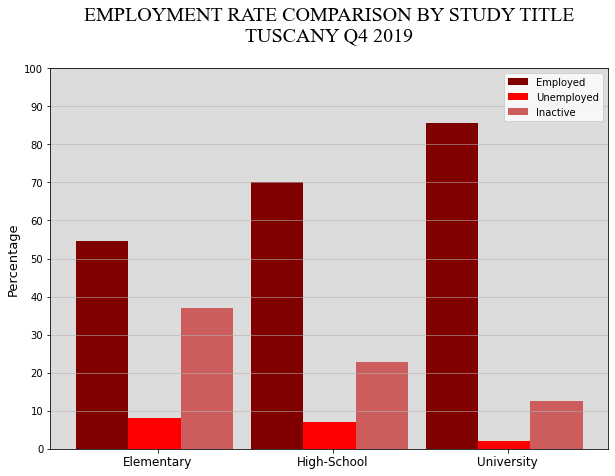

In [31]:
ts_empl_plot(9,19)

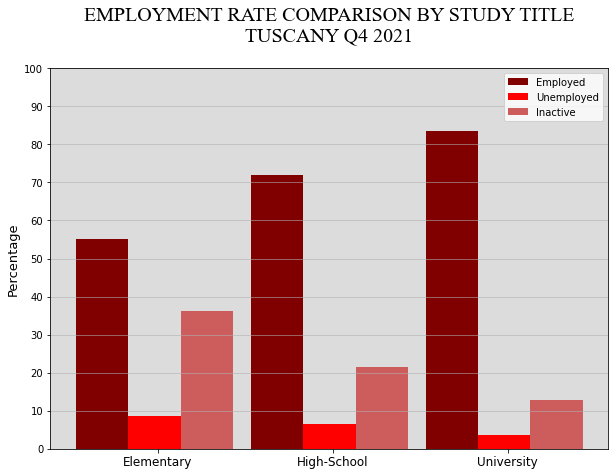

In [32]:
ts_empl_plot(9,21)

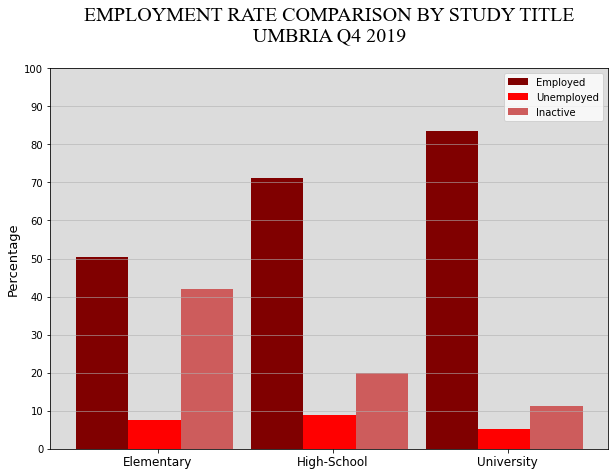

In [33]:
ts_empl_plot(10,19)

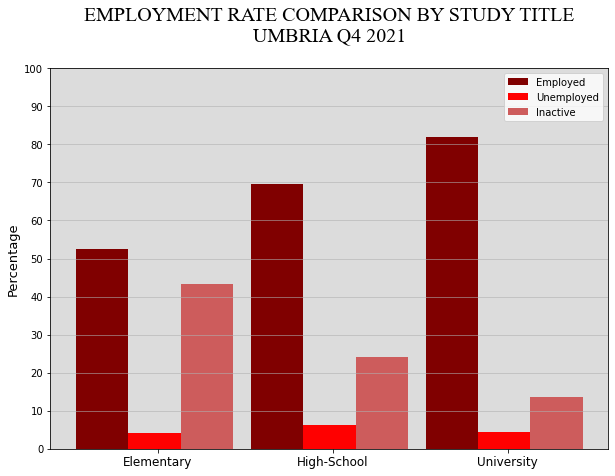

In [34]:
ts_empl_plot(10,21)

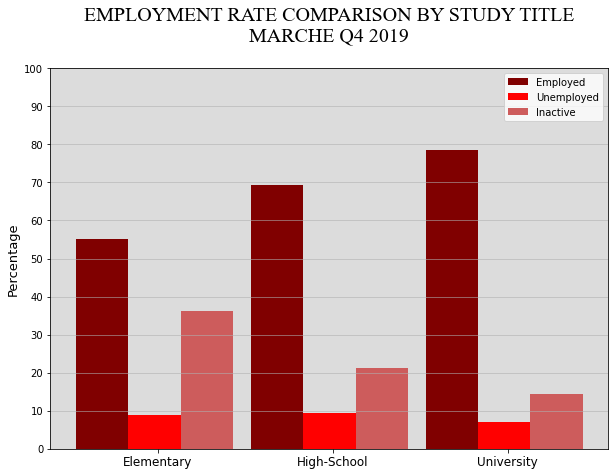

In [35]:
ts_empl_plot(11,19)

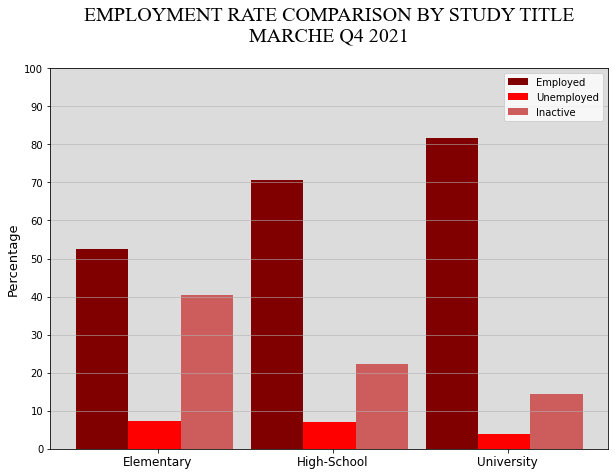

In [36]:
ts_empl_plot(11,21)

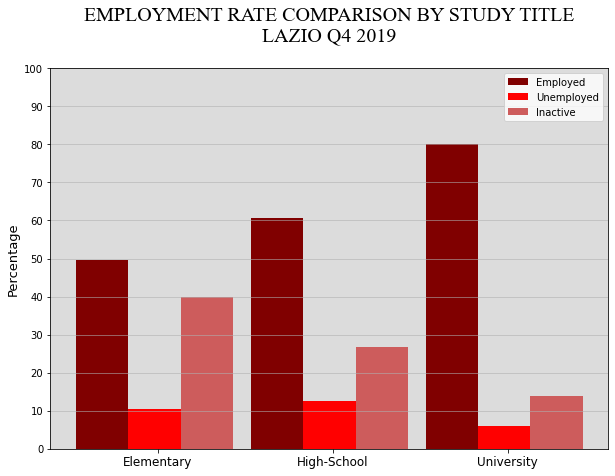

In [37]:
ts_empl_plot(12,19)

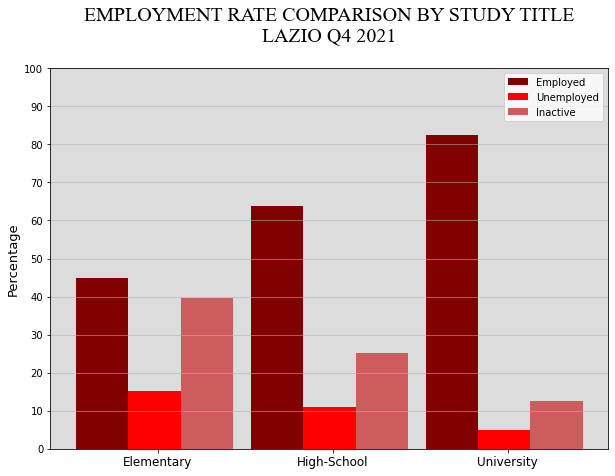

In [38]:
ts_empl_plot(12,21)

Now, to sum it all up, I will create two plots depicting the **average values**.

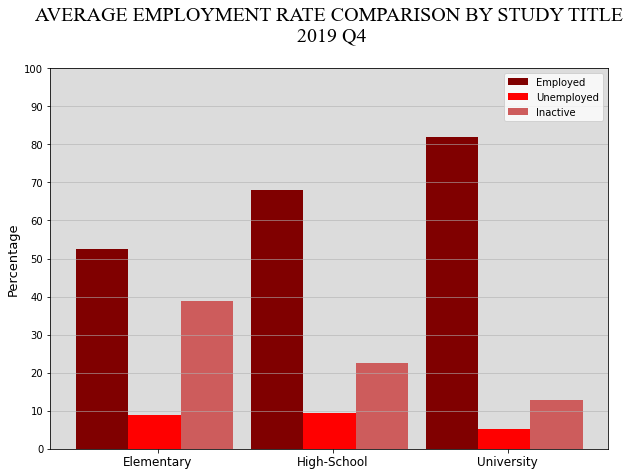

In [39]:
ts_empl_plot("average",19)

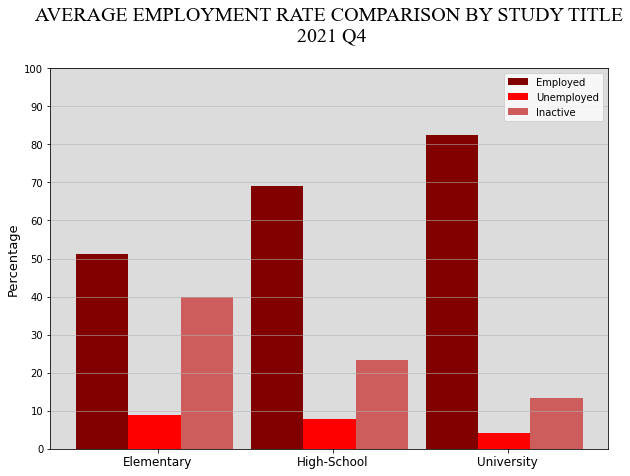

In [40]:
ts_empl_plot("average",21)

## Differences between males and females

In this section we will analyse deeper the employment rate, splitting between men and women. To do so, we create the function **occ_mf**, meaning _occupation male, female_. After this we will create a list to store the results and a plot function. 

In [41]:
q4_19

,REG,EDULEV,CLETAS,J_FOUND,J_PUB_STR,J_SAT,GENDER,COND3,COND10,COEFF
11,9,2,17,,,,2,3,10,9052
47,12,5,15,,,,1,3,10,3418
48,12,6,16,,,,2,3,10,3418
53,11,6,10,004,002,007,2,1,1,3233
93,9,5,12,005,002,008,2,1,1,22498
...,...,...,...,...,...,...,...,...,...,...
94116,10,5,17,,,,1,3,10,2306
94117,10,2,17,,,,2,3,10,2306
94118,12,6,9,002,002,006,1,1,1,34050
94119,12,6,8,002,002,007,2,1,1,34050


In [42]:
def occ_mf(reg, anno):
    if anno==19:
        df=q4_19
    else:
        df=q4_21
    a=df[df.REG==reg]   
    a=round(a.groupby(by=["COND10", "GENDER"])["COEFF"].sum()/10000)
    a=a.unstack(level=0)
    o_m=a.loc[1][1]/pd.Series(list(a.loc[1])[:8]).sum()*100
    o_f=a.loc[2][1]/pd.Series(list(a.loc[1])[:8]).sum()*100
    r_list=[]
    r_list.append(o_m)
    r_list.append(o_f)
    return r_list

In [43]:
occ_gender=[]
for reg_index in range(9,13):
    occ_gender.append(occ_mf(reg_index,19))
for reg_index in range(9,13):
    occ_gender.append(occ_mf(reg_index,21))

In [44]:
occ_m=[]
occ_f=[]
for i in range(8):
    occ_m.append(occ_gender[i][0])
    occ_f.append(occ_gender[i][1])

In [45]:
occ_gender=[]
for reg_index in range(9,13):
    occ_gender.append(occ_mf(reg_index,19))
for reg_index in range(9,13):
    occ_gender.append(occ_mf(reg_index,21))

occ_m=[]
occ_f=[]
for i in range(8):
    occ_m.append(occ_gender[i][0])
    occ_f.append(occ_gender[i][1])

In [46]:
def occ_mf_plot(anno):
    if anno==19:
        occ_m1=occ_m[0:4]
        occ_f1=occ_f[0:4]
    else:
        occ_m1=occ_m[4:8]
        occ_f1=occ_f[4:8]
        
    plt.figure(figsize=(10,7))
    n=4
    width=0.3
    ind=np.arange(n)
    ax=plt.axes()
    plt.bar(ind, occ_m1, width, label='Males',color="maroon")
    plt.bar(ind + width, occ_f1, width, label='Females',color="red")
    plt.xticks(ind + width / 2, (regions.values()), fontsize=12)
    plt.legend()
    plt.grid(alpha=0.7)
    plt.ylim([0,100])
    plt.yticks(range(0,101,10))
    ax.set_facecolor("gainsboro")
    plt.ylabel("Percentage", fontsize=13)
    plt.title("EMPLOYMENT RATE COMPARISON BY GENDER 20" +str(anno)
              +" Q4\n", fontsize=20, fontname='Times New Roman')
    plt.show()

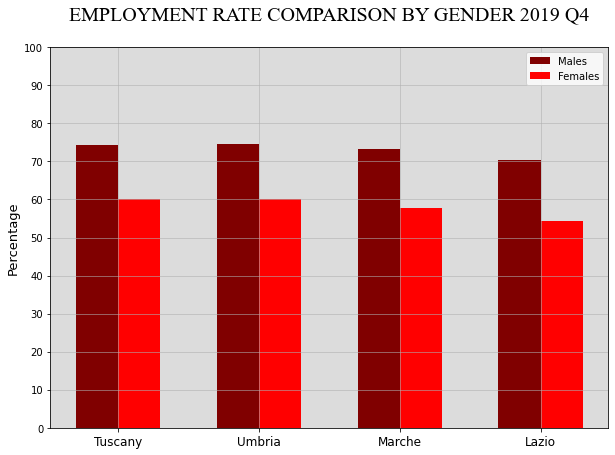

In [47]:
occ_mf_plot(19)

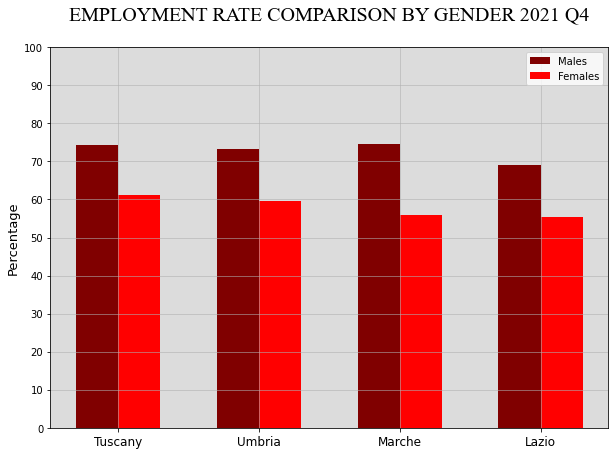

In [48]:
occ_mf_plot(21)

### CONCLUSIONS

Here we conclude the notebook. The analysis was variegated with quite complex levels of Pandas and Matplotlib. I hope you had a great time reading the code and following along.

Guglielmo